# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
new_cities = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append((response['coord']['lon']))
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        new_cities.append(city)
        print(f"Processing {city} found!.")
    except:
        print(f'{city} result does not exist')
        pass

Processing ahipara found!.
Processing arawa found!.
Processing husavik found!.
Processing rikitea found!.
Processing port elizabeth found!.
Processing busselton found!.
Processing meulaboh found!.
Processing takoradi found!.
illoqqortoormiut result does not exist
Processing imbituba found!.
Processing manaia found!.
Processing zeya found!.
Processing butaritari found!.
Processing sabang found!.
Processing saint george found!.
Processing yellowknife found!.
Processing brae found!.
Processing ushuaia found!.
Processing tiksi found!.
Processing mataura found!.
Processing chokurdakh found!.
Processing dikson found!.
Processing albany found!.
Processing alofi found!.
Processing senador jose porfirio found!.
Processing leningradskiy found!.
chagda result does not exist
Processing tura found!.
Processing tessalit found!.
attawapiskat result does not exist
marcona result does not exist
Processing east london found!.
Processing awjilah found!.
Processing nelson bay found!.
Processing rumuruti f

Processing ndele found!.
Processing kankon found!.
Processing fairbanks found!.
Processing tatawin found!.
Processing pangnirtung found!.
Processing mangochi found!.
Processing mulege found!.
Processing puri found!.
Processing port blair found!.
Processing pochutla found!.
Processing dzhebariki-khaya found!.
Processing yabelo found!.
Processing leh found!.
Processing kollo found!.
Processing dhidhdhoo found!.
Processing gela found!.
Processing tazovskiy found!.
Processing dali found!.
Processing north bend found!.
Processing jutai found!.
Processing necochea found!.
Processing faya found!.
Processing chalinze found!.
Processing bathsheba found!.
Processing redlands found!.
Processing general pico found!.
Processing lokosovo found!.
Processing miraflores found!.
Processing luganville found!.
Processing cherskiy found!.
Processing vao found!.
Processing natal found!.
Processing college found!.
Processing alamosa found!.
Processing sechura found!.
Processing thinadhoo found!.
Processing l

Processing aykhal found!.
Processing xinpu found!.
Processing tombouctou found!.
Processing washougal found!.
Processing bonavista found!.
Processing ust-tsilma found!.
Processing iqaluit found!.
Processing fethiye found!.
Processing williams lake found!.
Processing muli found!.
Processing wagga wagga found!.
bengkalis result does not exist
Processing corralillo found!.
Processing muros found!.
Processing coquimbo found!.
Processing olafsvik found!.
Processing chabahar found!.
stoyba result does not exist
Processing porto walter found!.
Processing ola found!.
Processing suluq found!.
jahrom result does not exist
Processing sambava found!.
Processing nouadhibou found!.
Processing yazoo city found!.
Processing tafresh found!.
denau result does not exist
Processing foam lake found!.
Processing manzhouli found!.
Processing entre rios found!.
ketchenery result does not exist
Processing xiangfan found!.
Processing goure found!.
Processing koulikoro found!.
Processing port augusta found!.
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
weather_dict = {
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,ahipara,-35.17,173.17,68.90,64,6.20,3
1,arawa,-6.21,155.54,85.30,64,2.73,52
2,husavik,66.04,-17.34,41.00,80,6.93,90
3,rikitea,-23.12,-134.97,74.71,80,23.55,100
4,port elizabeth,-33.92,25.57,62.60,93,11.41,75
...,...,...,...,...,...,...,...
571,havoysund,71.00,24.66,33.80,80,46.08,75
572,harper,4.38,-7.72,77.95,87,6.78,78
573,plettenberg bay,-34.05,23.37,62.17,90,14.00,100
574,chulman,56.85,124.91,22.69,94,3.53,100


In [77]:
weather_data.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,21.355712,19.600417,56.969878,74.534722,8.352292,56.149306
std,33.294136,91.160727,21.395105,19.668085,6.162731,37.778373
min,-54.800000,-179.170000,-2.200000,11.000000,0.360000,0.000000
25%,-6.222500,-61.555000,42.182500,66.000000,3.875000,20.000000
50%,25.610000,21.585000,60.955000,80.000000,6.930000,70.500000
75%,50.287500,102.330000,75.652500,88.000000,11.180000,90.000000
max,78.220000,179.320000,88.560000,100.000000,46.080000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
humidity_over = weather_data.loc[(weather_data['Humidity'] > 100)]
humidity_over

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness


In [79]:
#  Get the indices of cities that have humidity over 100%.


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

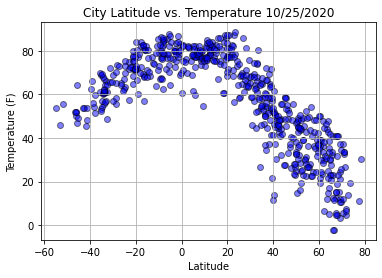

In [81]:
latitude = weather_data['Latitude']

plt.scatter(latitude,weather_data['Temperature'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs. Temperature 10/25/2020')
plt.grid()
plt.show()

#As postulated in the instructions, temperatures rise in general when approaching the equator,
#since there are negative values associated with the southern hemisphere, the shape is seen
#as more of a parabola.

## Latitude vs. Humidity Plot

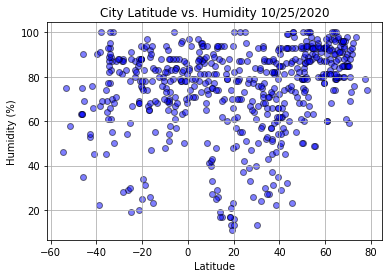

In [82]:
plt.scatter(latitude,weather_data['Humidity'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/25/2020')
plt.grid()
plt.show()

#Visually, there doesn't seen to be much of a relationship between humidity and latitude,
#there does appear to be clustering at 70% and above humidity throughout all locations. 

## Latitude vs. Cloudiness Plot

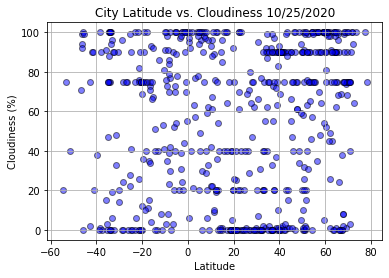

In [83]:
plt.scatter(latitude,weather_data['Cloudiness'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 10/25/2020')
plt.grid()
plt.show()

#Like humidity, cloudiness does not appear to have much relationship with a location's
#latitude, the cloudiness percentages appear to be reported on more regimented increments
#leading to lines of markers across the gridlines.

## Latitude vs. Wind Speed Plot

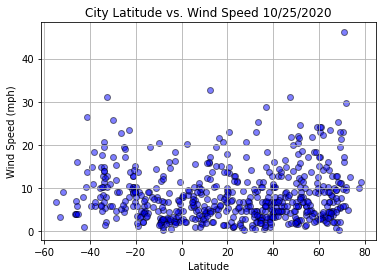

In [84]:
plt.scatter(latitude,weather_data['Wind Speed'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed 10/25/2020')
plt.grid()
plt.show()

#Again, there does not appear to be much relationship between wind speed and latitude;
#but kind of in an inverse of the humidity plot, there are not too many values above 
#25 mph. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

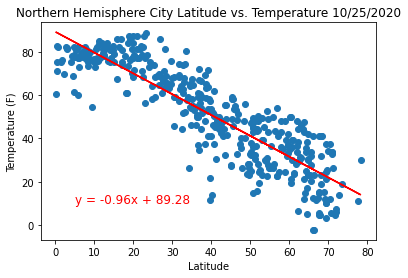

The r-value is -0.8758310396681267


In [85]:
northern_hem = weather_data.loc[(weather_data['Latitude'] > 0)]
northern_lat = northern_hem['Latitude']

plt.scatter(northern_lat,northern_hem['Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere City Latitude vs. Temperature 10/25/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Temperature'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

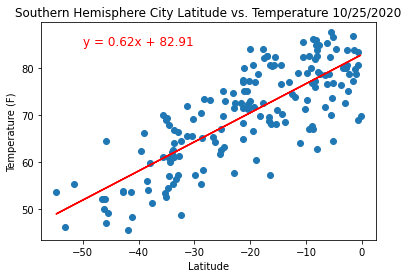

The r-value is 0.7999069980993604


In [86]:
southern_hem = weather_data.loc[(weather_data['Latitude'] < 0)]
southern_lat = southern_hem['Latitude']

plt.scatter(southern_lat,southern_hem['Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Temperature 10/25/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Temperature'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,85),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Both northern and southern hemisphere plots show relatively strong correlation,
#going in opposite directions as we would expect. There is a slightly stronger correlation 
#in the northern hemisphere with more scattering seen in the southern graph. It is somewhat 
#notable that there is almost a perfect exact -1 slope for the northern hemisphere, showing
#that for every degree you move north from the equator you would see 1 degree less Fahrenheit. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

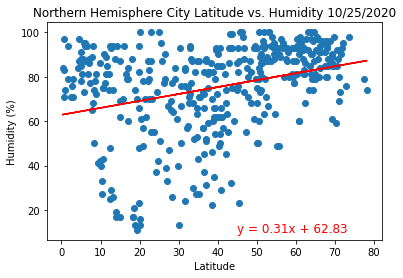

The r-value is 0.3133959059233179


In [87]:
plt.scatter(northern_lat,northern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity 10/25/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Humidity'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(45,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

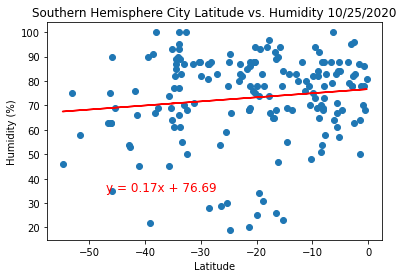

The r-value is 0.12573216496948778


In [88]:
plt.scatter(southern_lat,southern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity 10/25/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Humidity'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-47,35),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#There is much less relationship seen with humidity and latitude than we saw with temperature,
#with the greater of the 2 correlation coefficients being only 0.33 in the nothern hemisphere,
#but this is more than 3 times that in the south, showing basically no relationship. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

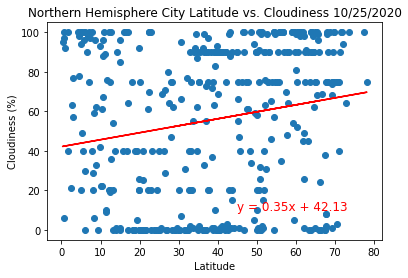

The r-value is 0.18818023990600888


In [89]:
plt.scatter(northern_lat,northern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness 10/25/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Cloudiness'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(45,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

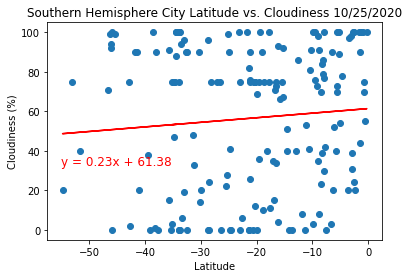

The r-value is 0.08493926270345611


In [90]:
plt.scatter(southern_lat,southern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness 10/25/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Cloudiness'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-55,33),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#As we saw on the visual breakdown of all the cities previously, there is almost no relationship
#on the cloudiness here at all. This does make logical sense though, given that cloudiness
#is more localized than some of our other weather measures.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

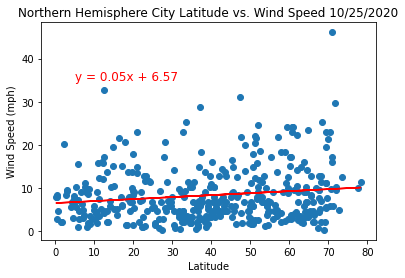

The r-value is 0.14827251580524292


In [91]:
plt.scatter(northern_lat,northern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed 10/25/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Wind Speed'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,35),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

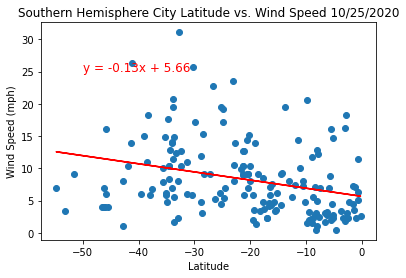

The r-value is -0.2941221857365862


In [92]:
plt.scatter(southern_lat,southern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed 10/25/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Wind Speed'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Again there is limited to no relationship shown, but as kind of an inverse of the humidity numbers,
#the southern hemisphere has about 2.5 times the correlation that the north does. 

In [93]:
weather_data.to_csv('../weather_data.csv')